# Objectif

Apprentissage de digit.

# Imports et récupération dataset

In [1]:
from rich import print

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import CategoricalNB, MultinomialNB, GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [5]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [29]:
from sklearn.metrics import confusion_matrix

In [6]:
from sklearn.decomposition import PCA

In [7]:
from sklearn.pipeline import Pipeline

In [8]:
from sklearn.datasets import load_digits

In [9]:
X, y = load_digits(return_X_y=True)

# Exploration initiale

In [10]:
X.shape

(1797, 64)

In [11]:
y.shape

(1797,)

In [12]:
X[1].reshape((8,8))

array([[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16.,  9.,  0.,  0.],
       [ 0.,  0.,  3., 15., 16.,  6.,  0.,  0.],
       [ 0.,  7., 15., 16., 16.,  2.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  3.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16., 10.,  0.,  0.]])

In [13]:
for i in range(10):
    print(f"Nombre d'éléments pour y={i}: {(y == i).sum()}.")

Nombre d'éléments pour y=0: 178.

Nombre d'éléments pour y=1: 182.

Nombre d'éléments pour y=2: 177.

Nombre d'éléments pour y=3: 183.

Nombre d'éléments pour y=4: 181.

Nombre d'éléments pour y=5: 182.

Nombre d'éléments pour y=6: 181.

Nombre d'éléments pour y=7: 179.

Nombre d'éléments pour y=8: 174.

Nombre d'éléments pour y=9: 180.

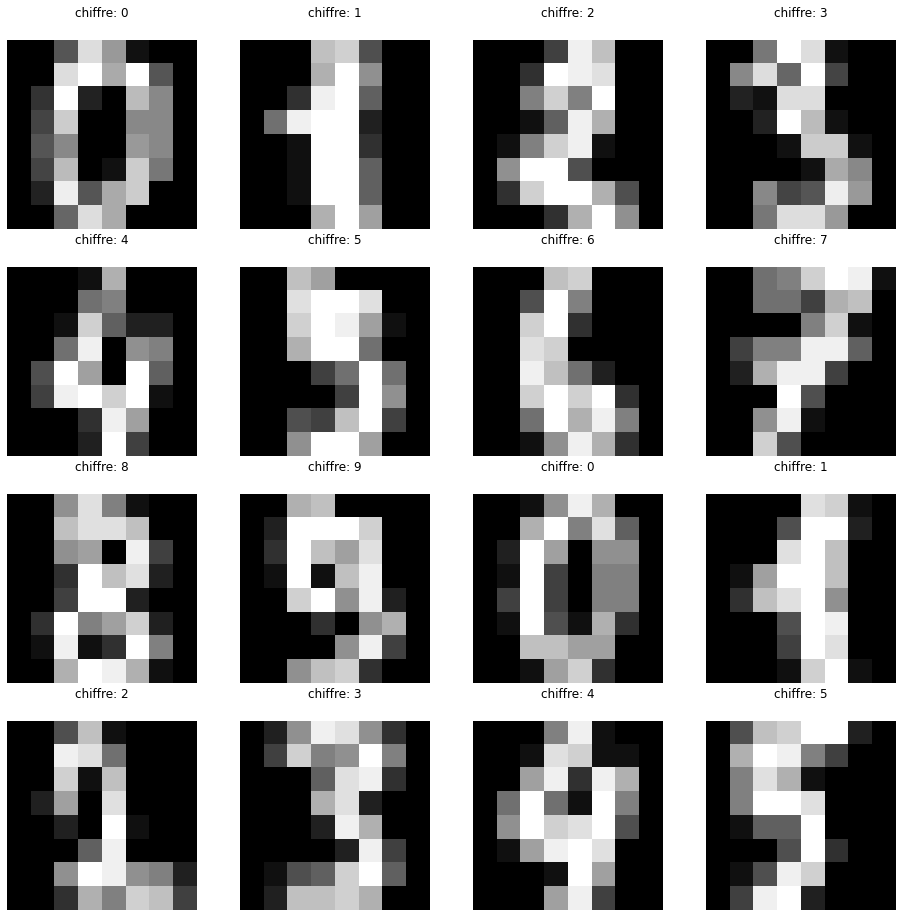

In [14]:
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))
for i in range(4):
    for j in range(4):
        repere = axs[i,j]
        repere.matshow(
            X[4 * i + j].reshape((8, 8)),
            cmap="gray",
        )
        repere.axis("off")
        repere.set_title(f"chiffre: {y[4*i+j]}")

# Apprentissage

In [15]:
resultats = dict()

In [16]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y, random_state=42)

## Pour comparaison

In [17]:
%%time
par = GridSearchCV(
    DummyClassifier(),
    param_grid={
        "strategy": ["prior", "uniform", "stratified"],
    }
)
par.fit(X_tr, y_tr)
resultats[par.best_estimator_] = par.best_score_

CPU times: user 21.3 ms, sys: 83 µs, total: 21.4 ms
Wall time: 20.6 ms


## Simples

In [18]:
%%time
par = MultinomialNB()
resultats[par] = cross_val_score(par, X_tr, y_tr)

CPU times: user 54.2 ms, sys: 39.1 ms, total: 93.2 ms
Wall time: 28.6 ms


In [19]:
%%time
par = LogisticRegression(max_iter=10000)
resultats[par] = cross_val_score(par, X_tr, y_tr)

CPU times: user 1min 25s, sys: 45 s, total: 2min 10s
Wall time: 33.1 s


In [20]:
%%time
pre = DecisionTreeClassifier()
resultats[par] = cross_val_score(par, X_tr, y_tr)

CPU times: user 1min 25s, sys: 44.6 s, total: 2min 9s
Wall time: 33 s


## Moins simples

In [21]:
%%time
par = GridSearchCV(
    KNeighborsClassifier(),
    param_grid={
        "n_neighbors": [3, 5, 7, 9, 11],
    }
)
par.fit(X_tr, y_tr)
resultats[par.best_estimator_] = par.best_score_

CPU times: user 1.69 s, sys: 977 ms, total: 2.66 s
Wall time: 678 ms


In [22]:
%%time
par = GridSearchCV(
    SVC(),
    param_grid={
        "C": [0.1, 0.5, 1., 5., 10., 50.],
    }
)
par.fit(X_tr, y_tr)
resultats[par.best_estimator_] = par.best_score_

CPU times: user 2.01 s, sys: 69.6 ms, total: 2.08 s
Wall time: 1.96 s


In [23]:
%%time
par = GridSearchCV(
    RandomForestClassifier(),
    param_grid={
        "n_estimators": [50, 100, 150, 200],
    }
)
par.fit(X_tr, y_tr)
resultats[par.best_estimator_] = par.best_score_

CPU times: user 6.78 s, sys: 26.9 ms, total: 6.81 s
Wall time: 6.81 s


In [24]:
%%time
par = GridSearchCV(
    MLPClassifier(),
    param_grid={
        "hidden_layer_sizes": [(100,), (50, 50), (25, 50, 25)],
    }
)
par.fit(X_tr, y_tr)
resultats[par.best_estimator_] = par.best_score_

CPU times: user 1min 6s, sys: 38 s, total: 1min 44s
Wall time: 26.7 s


## Synthèse

In [25]:
print(resultats)

{
    DummyClassifier(strategy='stratified'): 0.1120886685942448,
    MultinomialNB(): array([0.86666667, 0.91851852, 0.91449814, 0.91078067, 0.88475836]),
    LogisticRegression(max_iter=10000): array([0.95925926, 0.95185185, 0.94423792, 
0.96282528, 0.92936803]),
    KNeighborsClassifier(n_neighbors=3): 0.9829216577171968,
    SVC(C=10.0): 0.9888641057414291,
    RandomForestClassifier(n_estimators=200): 0.9710477764009363,
    MLPClassifier(): 0.9650998210106018
}

In [26]:
meilleur = SVC(C=10.)
meilleur.fit(X_tr, y_tr)

SVC(C=10.0)

In [27]:
meilleur.score(X_tr, y_tr)

1.0

In [28]:
meilleur.score(X_te, y_te)

0.9888888888888889

In [31]:
confusion_matrix(y_tr, meilleur.predict(X_tr))

array([[135,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 145,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 139,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 137,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 126,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 123,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 136,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 138,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 136,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 132]])

In [32]:
confusion_matrix(y_te, meilleur.predict(X_te))

array([[43,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 37,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 38,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 44,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 55,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 59,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 45,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 40,  0,  1],
       [ 0,  0,  0,  0,  0,  1,  0,  0, 37,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0, 47]])

**REMARQUE** on pourrait encore plus automatiser avec un fichier de configurations contenant les modèles et leurs grilles de paramètres.